Variables to optimize: The first one was the shape of the yield response to N, expressed in relative values to the maximum ( Fig. 2 ). The second and third one compared the distribution of the EONR ( Fig. 3 ) and the yield ( figure 4 ) for the base-level condition.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
indiana_info=pd.read_csv("/workspace/pipeline/preliminary1/validation/NRCS_N_project_Indiana_dataset_2025.04.csv")
ground_truth=indiana_info[['County','Year','FieldID','GridID','PreCrop','rTN_lbac','rY15_mtha']]
ground_truth.head(10)

,County,Year,FieldID,GridID,PreCrop,rTN_lbac,rY15_mtha
0,White,22,CH_22,4,Soybean,221,13.0
1,White,22,CH_22,7,Soybean,203,10.9
2,White,22,CH_22,12,Soybean,203,13.9
3,White,22,CH_22,24,Soybean,204,13.9
4,White,22,CH_22,29,Soybean,205,13.8
5,White,22,CH_22,43,Soybean,209,14.3
6,White,22,CH_22,5,Soybean,183,14.4
7,White,22,CH_22,8,Soybean,178,13.0
8,White,22,CH_22,15,Soybean,181,14.1
9,White,22,CH_22,26,Soybean,178,13.9


In [ ]:
ground_truth.Year.unique()

array([22, 23, 21])

: 

In [25]:
ground_truth.County.unique()

array(['White', 'Randolph', 'Dubois', 'Marshall', 'Clay'], dtype=object)

In [26]:
ground_truth["County"] = ground_truth["County"].replace({
    "White": "White County",
    "Randolph": "Randolph County",
    "Dubois": "Dubois County",
    "Marshall": "Marshall County",
    "Clay": "Clay County"
})

/tmp/ipykernel_3038/1375266808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


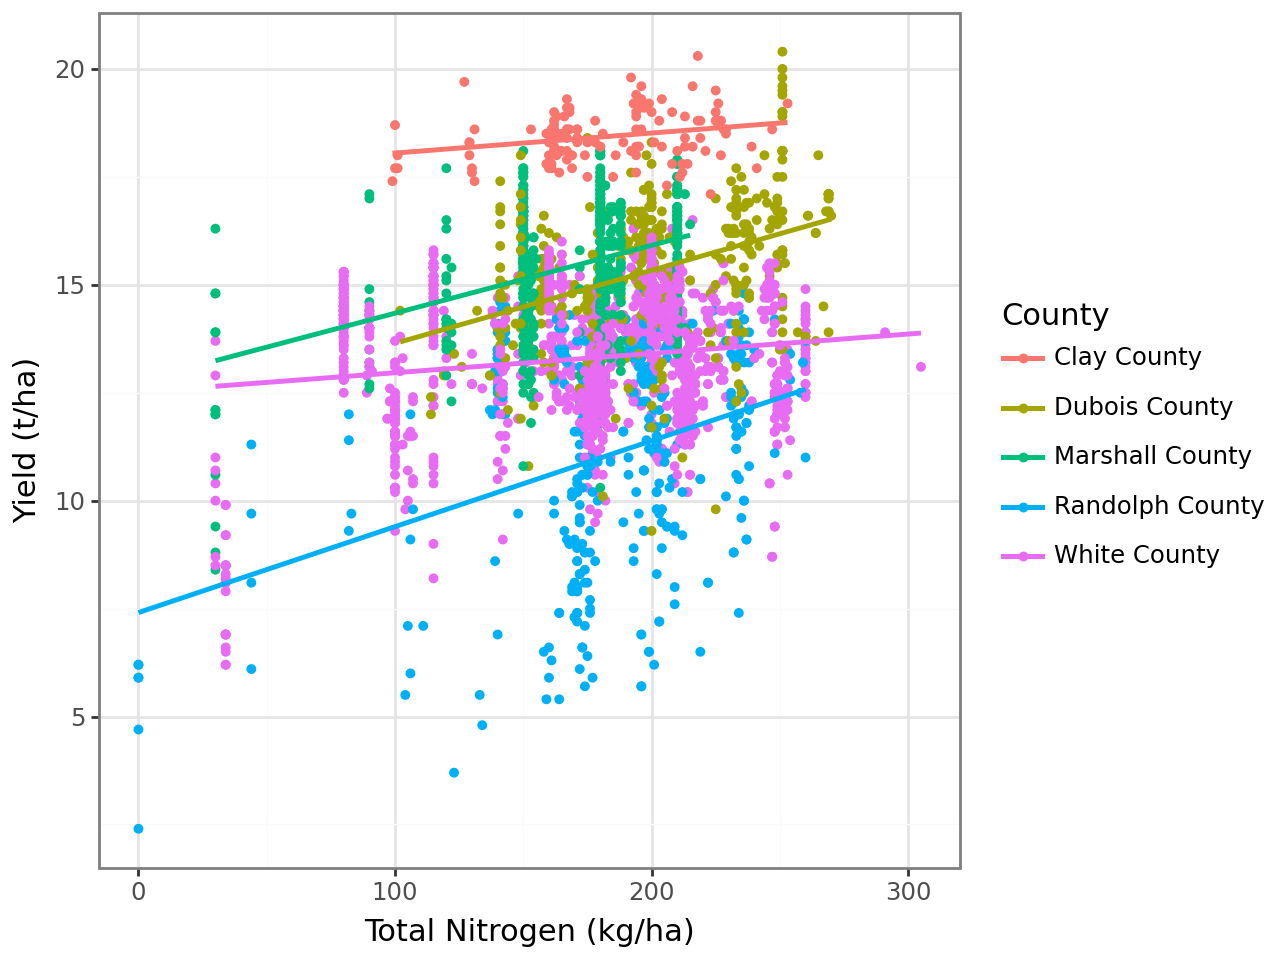

In [27]:
from plotnine import ggplot, aes, geom_point, geom_smooth, labs, theme_bw

plot = (
    ggplot(ground_truth, aes(x='rTN_lbac', y='rY15_mtha', color='County')) +
    geom_point(size=1) +
    geom_smooth(method='lm', se=False) +
    theme_bw() +
    labs(
        x='Total Nitrogen (kg/ha)',
        y='Yield (t/ha)',
        color='County'
    )
)

plot


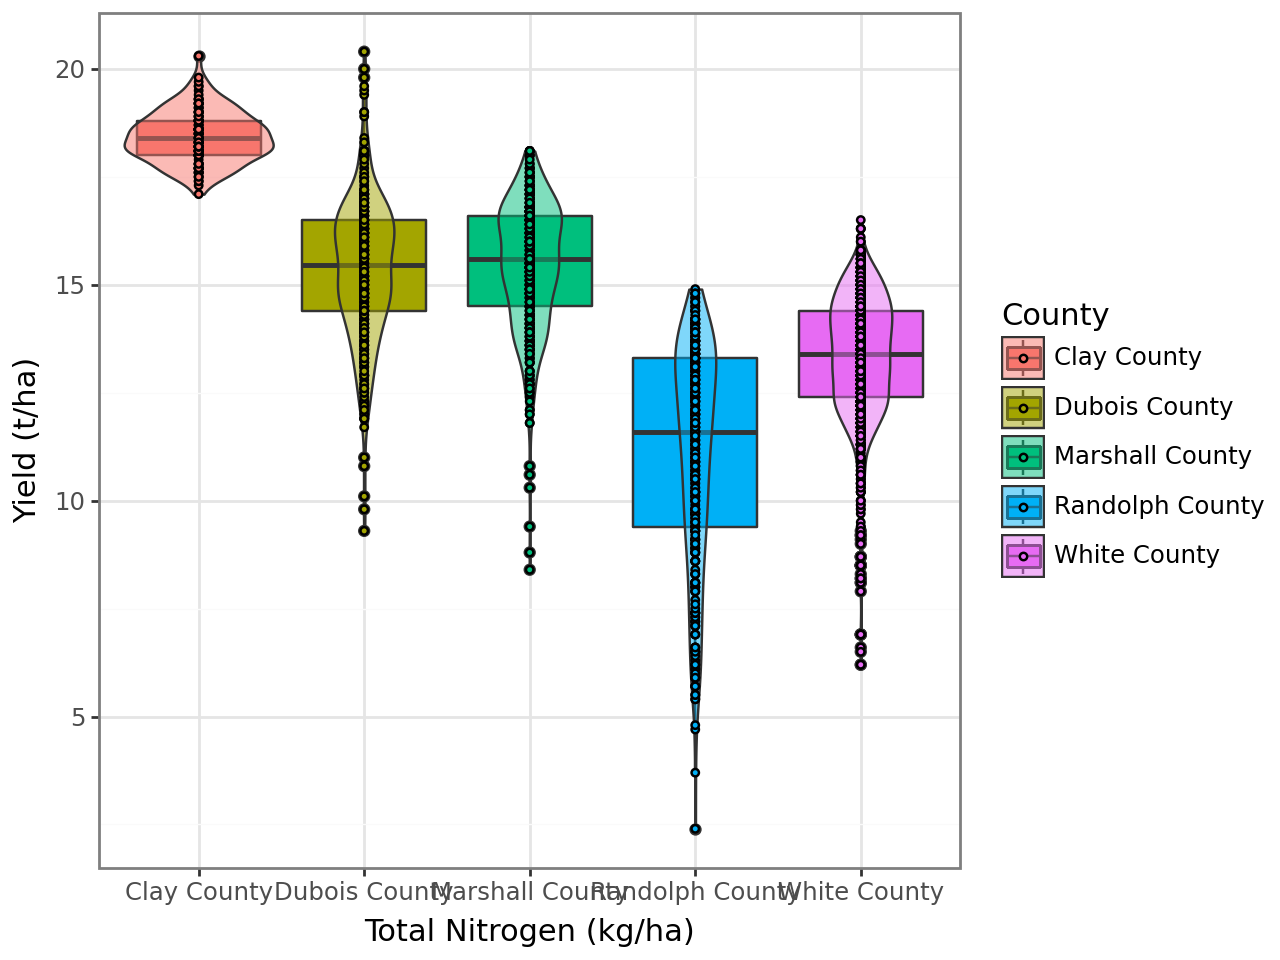

In [28]:
from plotnine import ggplot, aes, geom_point, geom_smooth, labs, theme_bw, geom_boxplot, geom_violin

plot = (
    ggplot(ground_truth, aes(x='County', y='rY15_mtha', fill='County')) +
    geom_boxplot()+
    geom_violin(alpha=0.5)+
    geom_point(size=1) +
    theme_bw() +
    labs(
        x='Total Nitrogen (kg/ha)',
        y='Yield (t/ha)',
        color='County'
    )
)

plot


In [29]:
predicted =pd.read_parquet("/workspace/preliminaryresults.parquet",engine="fastparquet")
predicted['Yield'] = (predicted['MaizeYield']+predicted['SoyBeanYield'])/1000
predicted = predicted[['Clock.Today','county','Yield','Nitrogen_Sowing','n_sim']]
predicted = predicted[predicted["Yield"] != 0]
predicted.columns=['Clock.Today','County','Yield','Nitrogen_Sowing','n_sim']
predicted

,Clock.Today,County,Yield,Nitrogen_Sowing,n_sim
178,2021-06-28,Clay County,0.068258,0,752
179,2021-06-29,Clay County,0.150552,0,752
180,2021-06-30,Clay County,0.223741,0,752
181,2021-07-01,Clay County,0.290292,0,752
182,2021-07-02,Clay County,0.338101,0,752
...,...,...,...,...,...
2921939,2024-11-01,White County,2.158476,270,1152
2921940,2024-11-02,White County,2.158476,270,1152
2921941,2024-11-03,White County,2.158476,270,1152
2921942,2024-11-04,White County,2.158476,270,1152


In [30]:
predicted["Clock.Today"] = pd.to_datetime(predicted["Clock.Today"])
predicted["Year"] = predicted["Clock.Today"].dt.year

predicted = (
    predicted.groupby(["Year", "County", "Nitrogen_Sowing",'n_sim'], as_index=False)["Yield"]
      .max()
)



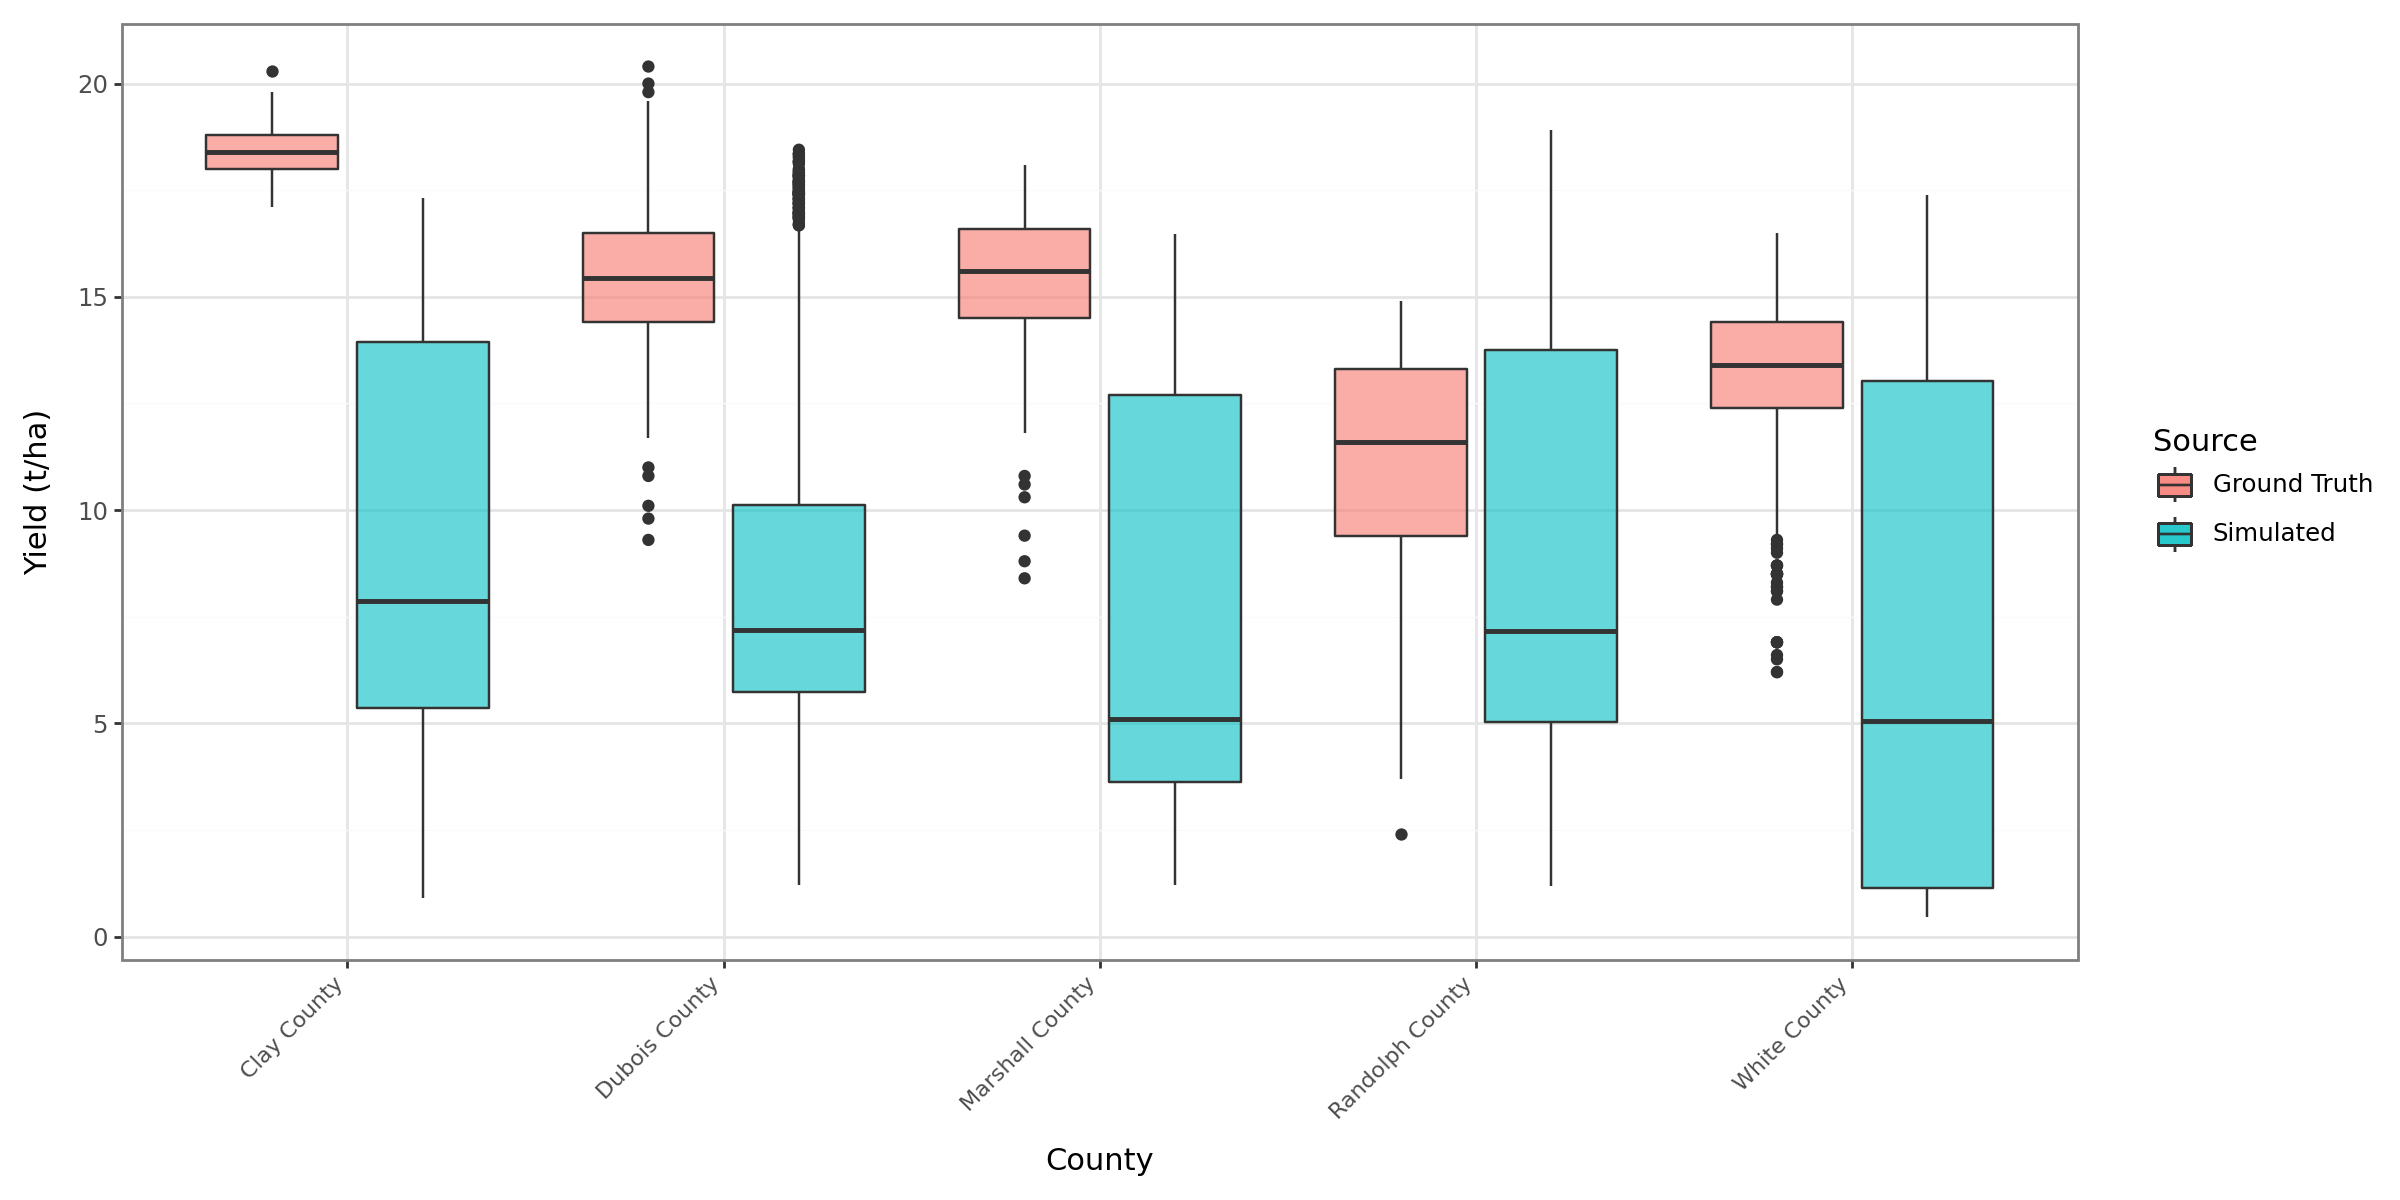

In [31]:
from plotnine import *
plot = (
    ggplot() +
    # Boxplots de valores observados
    geom_boxplot(
        data=ground_truth,
        mapping=aes(x='County', y='rY15_mtha', fill='"Ground Truth"'),
        position=position_nudge(x=-0.2),
        width=0.35,
        alpha=0.6
    ) +
    # Boxplots de valores predichos
    geom_boxplot(
        data=predicted,
        mapping=aes(x='County', y='Yield', fill='"Simulated"'),
        position=position_nudge(x=0.2),
        width=0.35,
        alpha=0.6
    ) +
    theme_bw() +
    labs(
        x='County',
        y='Yield (t/ha)',
        fill='Source'
    )+
    theme(
        axis_text_x=element_text(size=8, angle=45, hjust=1),  # 🔹 tamaño y rotación
        figure_size=(12, 6)  # 🔹 hace el gráfico más ancho directamente
    )
)

plot


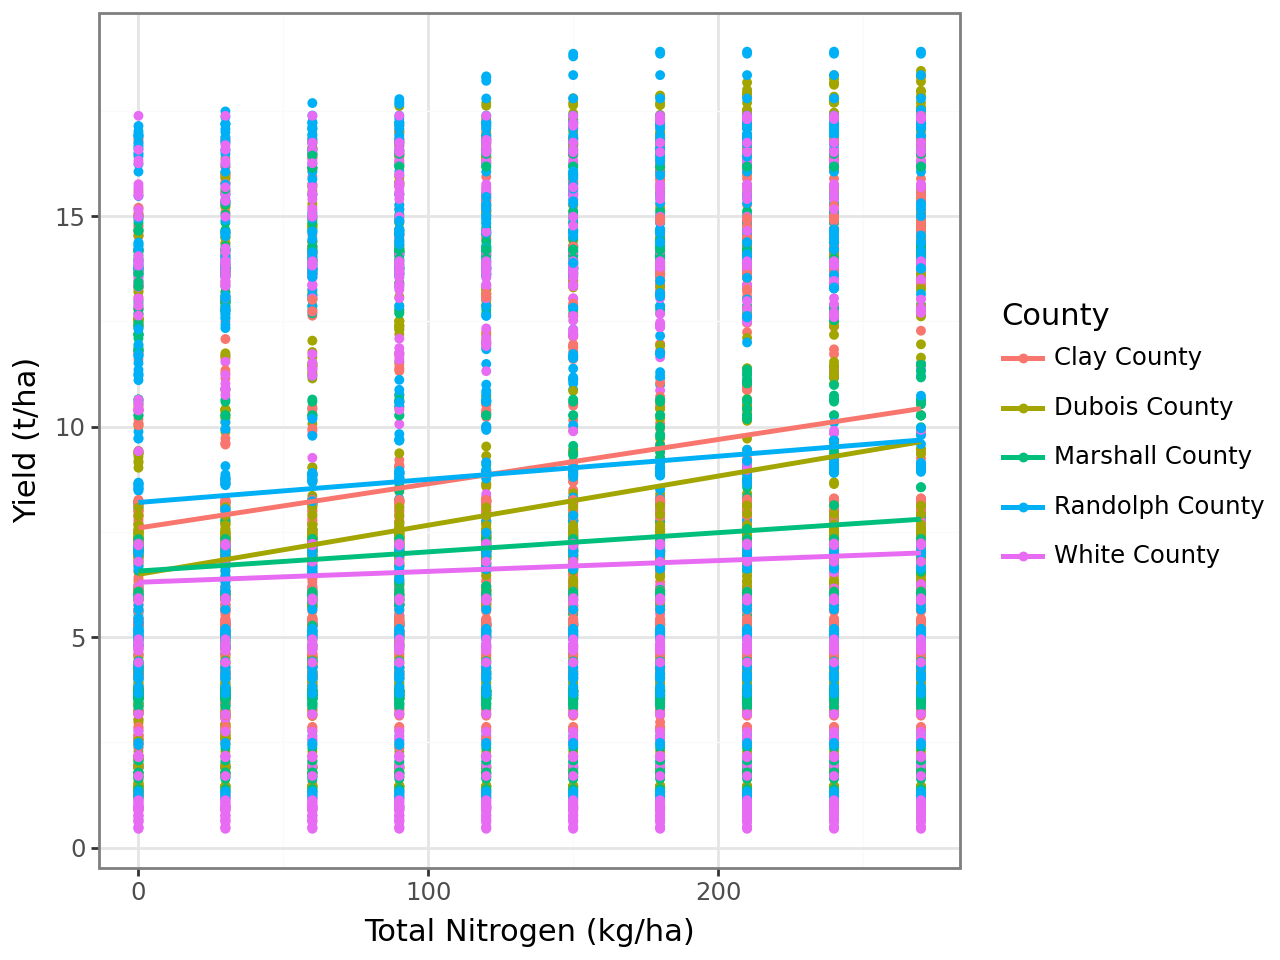

In [32]:
from plotnine import ggplot, aes, geom_point, geom_smooth, labs, theme_bw

plot = (
    ggplot(predicted, aes(x='Nitrogen_Sowing', y='Yield', color='County')) +
    geom_point(size=1) +
    geom_smooth(method='lm', se=False) +
    theme_bw() +
    labs(
        x='Total Nitrogen (kg/ha)',
        y='Yield (t/ha)',
        color='County'
    )
)

plot


In [33]:
# import pandas as pd

# # Leer los parquets
# df1 = pd.read_parquet("/workspace/merged_results.parquet")
# df2 = pd.read_parquet("/workspace/merged_results2.parquet")
# df3 = pd.read_parquet("/workspace/merged_results3.parquet")

# # Unirlos por filas
# df_final = pd.concat([df1, df2, df3], ignore_index=True)

# # Guardarlo en un solo parquet
# df_final.to_parquet("preliminaryresults.parquet", index=False)
